### 과제 할일 정리
- (필수) 강의내용 및 실습 코드 정리
- (필수) Crawling_exercise1
- (선택) Crawling_exercise2 
- (선택) 본인 데이터 적용

# 웹 크롤링1 - Static Crawling


## 1. urllib
- 파이썬은 웹 사이트에 있는 데이터를 추출하기 위해 urllib 라이브러리 사용
- 이를 이용해 HTTP 또는 FTP를 사용해 데이터 다운로드 가능
- urllib은 URL을 다루는 모듈을 모아 놓은 패키지
- urllib.request 모듈은 웹 사이트에 있는 데이터에 접근하는 기능 제공, 또한 인증, 리다렉트, 쿠키처럼 인터넷을 이용한 다양한 요청과 처리가 가능

In [5]:
from urllib import request

## 1.1. urllib.request를 이용한 다운로드
- urllib.request 모듈에 있는 urlretrieve() 함수 이용
- 다음의 코드는 PNG 파일을 test.png 라는 이름의 파일로 저장하는 예제임

In [7]:
# 라이브러리 읽어들이기 
from urllib import request

url="http://uta.pw/shodou/img/28/214.png"
savename="test.png"

request.urlretrieve(url, savename)
print("저장되었습니다")

저장되었습니다


## 1.2. urlopen으로 파일에 저장하는 방법
- request.urlopen()은 메모리에 데이터를 올린 후 파일에 저장하게 된다.

In [9]:
# URL과 저장경로 지정하기
url = "http://uta.pw/shodou/img/28/214.png"
savename = "test1.png"
#다운로드
mem = request.urlopen(url).read()
#파일로 저장하기, wb는 쓰기와 바이너리모드
with open(savename, mode="wb") as f:
    f.write(mem)
    print("저장되었습니다..")

저장되었습니다..


## 1.3. API 사용하기
### 클라이언트 접속 정보 출력 (기본)
- API는 사용자의 요청에 따라 정보를 반환하는 프로그램
- IP 주소, UserAgent 등 클라이언트 접속정보 출력하는 "IP 확인 API" 접근해서 정보를 추출하는 프로그램

In [11]:
#데이터 읽어들이기
url="http://api.aoikujira.com/ip/ini"
res=request.urlopen(url)
data=res.read()

#바이너리를 문자열로 변환하기
text=data.decode("utf-8")
print(text)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=125.180.20.71
REMOTE_HOST=125.180.20.71
REMOTE_PORT=45034
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.7
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini




## 2. BeautifulSoup
- 스크레이핑(Scraping or Crawling)이란 웹 사이트에서 데이터를 추출하고, 원하는 정보를 추출하는 것을 의미
- BeautifulSoup란 파이썬으로 스크레이핑할 때 사용되는 라이브러리로서 HTML/XML에서 정보를 추출할 수 있도록 도와줌. 그러나 다운로드 기능은 없음.
- 파이썬 라이브러리는 pip 명령어를 이용해 설치 가능. Python Package Index(PyPI)에 있는 패키지 명령어를 한줄로 설치 가능

### 패키지 import 및 예제 HTML

In [14]:
from bs4 import BeautifulSoup

In [15]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

## 2.1. 기본 사용
- 다음은 Beautifulsoup를 이용하여 웹사이트로부터 HTML을 가져와 문자열로 만들어 이용하는 예제임

- h1 태그를 접근하기 위해 html-body-h1 구조를 사용하여 soup.html.body.h1 이런식으로 이용하게 됨.

- p 태그는 두개가 있어 soup.html.body.p 한 후 next_sibling을 두번 이용하여 다음 p를 추출. 한번만 하면 그 다음 공백이 추출됨.
HTML 태그가 복잡한 경우 이런 방식으로 계속 진행하기는 적합하지 않음.

### 2) HTML 분석하기

In [18]:
soup = BeautifulSoup(html, 'html.parser')

### 3) 원하는 부분 추출하기

In [20]:
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling

### 4) 요소의 글자 출력하기

In [23]:
print(f"h1 = {h1.string}")
print(f"p  = {p1.string}")
print(f"p  = {p2.string}")

h1 = 스크레이핑이란?
p  = 웹 페이지를 분석하는 것
p  = 원하는 부분을 추출하는 것


## 2.2. 요소를 찾는 method
### 단일 element 추출: find()
BeautifulSoup는 루트부터 하나하나 요소를 찾는 방법 말고도 find()라는 메소드를 제공함

In [25]:
soup = BeautifulSoup(html, 'html.parser')

- 1) find() 메서드로 원하는 부분 추출하기

In [28]:
title = soup.find("h1")
body  = soup.find("p")
print(title)

<h1>스크레이핑이란?</h1>


- 2) 텍스트 부분 출력하기

In [30]:
print(f"#title = {title.string}" )
print(f"#body = {body.string}")

#title = 스크레이핑이란?
#body = 웹 페이지를 분석하는 것


### 복수 elements 추출: find_all()
여러개의 태그를 한번에 추출하고자 할때 사용함. 다음의 예제에서는 여러개의 태그를 추출하는 법을 보여주고 있음

In [32]:
html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')

- 1) find_all() 메서드로 추출하기

In [34]:
links = soup.find_all("a")
print(links, len(links))

[<a href="http://www.naver.com">naver</a>, <a href="http://www.daum.net">daum</a>] 2


- 2) 링크 목록 출력하기

In [36]:
for a in links:
    href = a.attrs['href'] # href의 속성에 있는 속성값을 추출
    text = a.string 
    print(text, ">", href)

naver > http://www.naver.com
daum > http://www.daum.net


## 3. Css Selector
Css Selector란, 웹상의 요소에 css를 적용하기 위한 문법으로, 즉 요소를 선택하기 위한 패턴입니다.

### BeautifulSoup에서 Css Selector 사용하기

In [39]:
html = """
<html><body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body></html>
"""

# HTML 분석하기 
soup = BeautifulSoup(html, 'html.parser')

- 필요한 부분을 CSS 쿼리로 추출하기

In [41]:
# 타이틀 부분 추출하기 --- (※3)
h1 = soup.select_one("div#meigen > h1").string
print(f"h1 = {h1}")

# 목록 부분 추출하기 --- (※4)
li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
  print(f"li = {li.string}")

h1 = 위키북스 도서
li = 유니티 게임 이펙트 입문
li = 스위프트로 시작하는 아이폰 앱 개발 교과서
li = 모던 웹사이트 디자인의 정석


## 4. 활용 예제
앞서 배운 urllib과 BeautifulSoup를 조합하면, 웹스크레이핑 및 API 요청 작업을 쉽게 수행하실 수 있습니다.

1. URL을 이용하여 웹으로부터 html을 읽어들임 (urllib)
2. html 분석 및 원하는 데이터를 추출 (BeautifulSoup)

In [43]:
from bs4 import BeautifulSoup
from urllib import request, parse

## 4.1. 네이버 금융 - 환율 정보
- 다양한 금융 정보가 공개돼 있는 "네이버 금융"에서 원/달러 환율 정보를 추출해보자!
- 네이버 금융의 시장 지표 페이지 https://finance.naver.com/marketindex/
- 다음은 원/달러 환율 정보를 추출하는 프로그램임

### 1) HTML 가져오기

In [46]:
url = "https://finance.naver.com/marketindex/"
res = request.urlopen(url)

### 2) HTML 분석하기

In [48]:
soup = BeautifulSoup(res, "html.parser")

### 3) 원하는 데이터 추출하기

In [50]:
price = soup.select_one("div.head_info > span.value").string
print("usd/krw =", price)

usd/krw = 1,171.50


## 4.2. 기상청 RSS
- 기상청 RSS에서 특정 내용을 추출하는 예제
- 기상청 RSS에서 XML 데이터를 추출하고 XML 내용을 출력
- 기상청의 RSS 서비스에 지역 번호를 지정하여 데이터 요청해보기 http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp
    - 참고: 기상청 RSS http://www.kma.go.kr/weather/lifenindustry/service_rss.jsp

### 1) HTML 가져오기

In [55]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

#매개변수를 URL로 인코딩한다.
values = {
    'stnId':'109'
}

params=parse.urlencode(values)
url += "?"+params # URL에 매개변수 추가
print("url=", url)

res = request.urlopen(url)

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109


### 2) HTML 분석하기

In [57]:
soup = BeautifulSoup(res, "html.parser")

### 3) 원하는 데이터 추출하기

In [59]:
header = soup.find("header")

title = header.find("title").text
wf = header.find("wf").text

print(title)
print(wf)

서울,경기도 육상중기예보
○ (기온) 이번 예보기간 낮 기온은 20~25도로 어제(24일, 25~27도)와 비슷하거나 조금 낮겠고, 아침 기온은 9~17도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 낮과 밤의 기온차가 10도 내외로 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.


- css selector 기반

In [61]:
title = soup.select_one("header > title").text
wf = header.select_one("header wf").text

print(title)
print(wf)

서울,경기도 육상중기예보
○ (기온) 이번 예보기간 낮 기온은 20~25도로 어제(24일, 25~27도)와 비슷하거나 조금 낮겠고, 아침 기온은 9~17도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 낮과 밤의 기온차가 10도 내외로 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.


## 4.3. 윤동주 작가의 작품 목록
- 위키문헌 (https://ko.wikisource.org/wiki) 에 공개되어 있는 윤동주의 작품목록을 가져오기
- 윤동주 위키 (https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC)
- 하늘과 바람과 시 부분을 선택한 후 오른쪽 마우스 이용해 copy selector로 카피하면 다음의 CSS 선택자가 카피됨
    - #mw-content-text > div > ul:nth-child(6) > li > b > a
- nth-child(n) 은 n 번째 요소를 의미 즉 6번째 요소를 의미, #mw-content-text 내부에 있는 url 태그는 모두 작품과 관련된 태그. 따라서 따로 구분할 필요는 없으며 생략해도 됨. BeautifulSoup는 nth-child 지원하지 않음
    - Recall PR7 Problem1

In [63]:
# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.

url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = request.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는 
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.
a_list = soup.select("#mw-content-text   ul > li  a")
for a in a_list:
    name = a.string
    print(f"- {name}", )

- 하늘과 바람과 별과 시
- 증보판
- 서시
- 자화상
- 소년
- 눈 오는 지도
- 돌아와 보는 밤
- 병원
- 새로운 길
- 간판 없는 거리
- 태초의 아침
- 또 태초의 아침
- 새벽이 올 때까지
- 무서운 시간
- 십자가
- 바람이 불어
- 슬픈 족속
- 눈감고 간다
- 또 다른 고향
- 길
- 별 헤는 밤
- 흰 그림자
- 사랑스런 추억
- 흐르는 거리
- 쉽게 씌어진 시
- 봄
- 참회록
- 간(肝)
- 위로
- 팔복
- 못자는밤
- 달같이
- 고추밭
- 아우의 인상화
- 사랑의 전당
- 이적
- 비오는 밤
- 산골물
- 유언
- 창
- 바다
- 비로봉
- 산협의 오후
- 명상
- 소낙비
- 한난계
- 풍경
- 달밤
- 장
- 밤
- 황혼이 바다가 되어
- 아침
- 빨래
- 꿈은 깨어지고
- 산림
- 이런날
- 산상
- 양지쪽
- 닭
- 가슴 1
- 가슴 2
- 비둘기
- 황혼
- 남쪽 하늘
- 창공
- 거리에서
- 삶과 죽음
- 초한대
- 산울림
- 해바라기 얼굴
- 귀뚜라미와 나와
- 애기의 새벽
- 햇빛·바람
- 반디불
- 둘 다
- 거짓부리
- 눈
- 참새
- 버선본
- 편지
- 봄
- 무얼 먹구 사나
- 굴뚝
- 햇비
- 빗자루
- 기왓장 내외
- 오줌싸개 지도
- 병아리
- 조개껍질
- 겨울
- 트루게네프의 언덕
- 달을 쏘다
- 별똥 떨어진 데
- 화원에 꽃이 핀다
- 종시


# 일반문제

In [30]:
from bs4 import BeautifulSoup
from urllib import request
import requests

## 1. 네이버 뉴스 헤드라인
배운 내용을 바탕으로 네이버 뉴스(https://news.naver.com/)에서 헤드라인 뉴스의 제목을 추출해보고자 합니다.

    Q: 다음의 코드에 css selector를 추가하여 최신 기사의 헤드라인을 스크레이핑하는 코드를 완성하시오.

In [33]:
# 기존 코드는 네이버에서 크롬 브라우저를 차단한 것 같다.
# 임의로 user agent를 추가해 크롤링에 성공했다.

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

url = "https://news.naver.com/"

#res = request.urlopen(url)
req = requests.get(url, headers=headers)
soup = BeautifulSoup(req.text, "html.parser")

selector = "#today_main_news > div.hdline_news > ul > li > div.hdline_article_tit > a"

for a in soup.select(selector):
    title = a.text
    print(title)


                                        코로나에 임금동결 택한 현대차…다른 완성차 협상에도 영향줄까
                                    

                                        “김정은, 계몽군주 같다” 유시민…야권 “국민 사살한 폭군”(종합)
                                    

                                        중국 반도체 숨통 끊나…美, SMIC도 제재한다
                                    

                                        왕이 中 외교부장 내달 방일…스가 총리 만날 듯
                                    

                                        “신도시 항공 촬영시도” 드론 하나 때문에...항공기 5대 회항(종합)
                                    


## 2. 시민의 소리 게시판
Q: 다음의 코드에 css selector를 추가하여 해당 페이지에서 게시글의 제목을 스크레이핑하는 코드를 완성하시오. 또한 과제 제출시 하단의 추가 내용을 참고하여 수집한 데이터를 csv 형태로 저장하여 해당 csv 파일도 함께 제출하시오.

In [71]:
url_head = "https://www.sisul.or.kr"

url_board = url_head + "/open_content/childrenpark/qna/qnaMsgList.do?pgno=1"



res = request.urlopen(url_board)
soup = BeautifulSoup(res, "html.parser")

# selector = "#detail_con > div.generalboard > table > tbody > tr > td.left.title > a"
selector = "#detail_con > div.generalboard > table > tbody > tr > td.left.title > a"
titles = []
links = []
for a in soup.select(selector):
    titles.append(a.text)
    links.append(url_head + a.attrs["href"])
    
print(titles, links)

    

['관리인 마스크', '어린이 대공원 쓰레기집하장 내 쓰레기 제거 요청 ', '마스크미착용으로 축구 및, 베트민턴 치는 인원이 너무 많아요.', '공원 내 마스크 착용', '청춘핫도그 점장님과 직원분께 감사드립니다', '카드결제를 거부하는 매점을 신고합니다', '참얼굴만큼예쁘고맘씨좋은 여직원을 만나 고마워서 글을남깁니다.', '놀이동산에서 불쾌함을 겪었습니다', '서문 플래카드', '간만에 친절한 아가씨를 만났어요.(놀이동산)'] ['https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=segzD63x1BUqhRyTOFYkTVBJuJTeZUIaLvYYhX4iXdTs77vjVvOAiaUlMKseeJHB.etisw1_servlet_user?qnaid=QNAS20200917000010&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=segzD63x1BUqhRyTOFYkTVBJuJTeZUIaLvYYhX4iXdTs77vjVvOAiaUlMKseeJHB.etisw1_servlet_user?qnaid=QNAS20200902000003&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=segzD63x1BUqhRyTOFYkTVBJuJTeZUIaLvYYhX4iXdTs77vjVvOAiaUlMKseeJHB.etisw1_servlet_user?qnaid=QNAS20200826000002&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=segzD63x1BUqhRyTOFYkTVBJuJTeZUIaLvYYhX4iXdTs77vjVvOAiaUlMKseeJHB.etisw1

### 추가 내용
수집된 자료를 데이터프레임으로 만들어 csv로 저장하는 것이 일반적입니다.

In [73]:
import pandas as pd


board_df = pd.DataFrame({"title": titles, "link": links})
board_df.head()

,title,link
0,관리인 마스크,https://www.sisul.or.kr/open_content/childrenp...
1,어린이 대공원 쓰레기집하장 내 쓰레기 제거 요청,https://www.sisul.or.kr/open_content/childrenp...
2,"마스크미착용으로 축구 및, 베트민턴 치는 인원이 너무 많아요.",https://www.sisul.or.kr/open_content/childrenp...
3,공원 내 마스크 착용,https://www.sisul.or.kr/open_content/childrenp...
4,청춘핫도그 점장님과 직원분께 감사드립니다,https://www.sisul.or.kr/open_content/childrenp...


In [74]:
board_df.to_csv("board.csv", index=False)

---------------------------
# (Optional) 웹 크롤링2 - Dynamic Crawling
# 0. 라이브러리

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
import time

# 1. Selenium 기초
## 1.1. Simple Text Crawling
멜론 사이트에서 노래 제목을 크롤링해보자

URL: https://www.melon.com/chart/index.htm

In [5]:
DRIVER_PATH = 'C:/Pselenium/chromedriver.exe'

In [6]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH) 
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# title crawling
title = WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.CSS_SELECTOR, "#frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > div")))

# print("Title: {}".format(title.text))

title.text

'Dynamite\n방탄소년단'

In [7]:
# 2번째 제목 크롤링
WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.XPATH, "//*[@id='frm']/div/table/tbody/tr[2]/td[4]/div/div"))).text

'취기를 빌려 (취향저격 그녀 X 산들)\n산들'

### 1.2. Text Crawling with for loop
Xpath의 규칙을 바탕으로 for loop 만들기

In [9]:
# chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []

# title crawling (TOP 50)
for i in range(1, 51):
    title = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f"//*[@id='frm']/div/table/tbody/tr[{i}]/td[4]/div/div")))
    title_list.append(title.text)
    
print(title_list)

['Dynamite\n방탄소년단', '취기를 빌려 (취향저격 그녀 X 산들)\n산들', '눈누난나 (NUNU NANA)\n제시 (Jessi)', '마리아 (Maria)\n화사 (Hwa Sa)', '다시 여기 바닷가\n싹쓰리 (유두래곤, 린다G, 비룡)', 'When We Disco (Duet with 선미)\n박진영', '오래된 노래\n스탠딩 에그', 'How You Like That\nBLACKPINK', '에잇(Prod.&Feat. SUGA of BTS)\n아이유', '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)\n규현 (KYUHYUN)', '아로하\n조정석', 'Dolphin\n오마이걸 (OH MY GIRL)', 'Downtown Baby\n블루 (BLOO)', '어떻게 지내 (Prod. By VAN.C)\n오반', '홀로\n이하이', 'Summer Hate (Feat. 비)\n지코 (ZICO)', 'Blueming\n아이유', 'Dance Monkey\nTones And I', '덤디덤디 (DUMDi DUMDi)\n(여자)아이들', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야\n장범준', 'Memories\nMaroon 5', '살짝 설렜어 (Nonstop)\n오마이걸 (OH MY GIRL)', 'METEOR\n창모 (CHANGMO)', 'Not Shy\nITZY (있지)', '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지\nAKMU (악동뮤지션)', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)\n방탄소년단', '사랑은 지날수록 더욱 선명하게 남아\n전상근', '사랑하게 될 줄 알았어\n전미도', '늦은 밤 너의 집 앞 골목길에서\n노을', 'Ice Cream (with Selena Gomez)\nBLACKPINK', '그 여름을 틀어줘\n싹쓰리 (유두래곤, 린다G, 비룡)', '거짓말이라도 해서 널 보고싶어\n백지영', '보라빛 밤 (pporappippam)\n선미', '모든 날, 모든 순간 (Every day

### 1.3. Text Crawling (Click & Back)
- 동적 크롤링(가사 가능)
- 노래 제목에 링크가 있기 때문에 링크 XPath 추가

In [11]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 1번째 click하기
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[1]/td[3]/div/a')))
click_element.click()    

# back
driver.back()


# 2번째 click하기
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="frm"]/div/table/tbody/tr[2]/td[3]/div/a')))
click_element.click()    

# back
driver.back()

### 1.4. Text Crawling including contents
- 첫 페이지 5개 글에 대해 title, artist, heart, lyrics 크롤링

In [13]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
# 브라우저에서 사용되는 엔진 자체에서 파싱되는 시간을 기다려줌
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []
artist_list = []
heart_list = []
lyrics_list = []

# crawling (TOP 5)
for i in range(1, 6):
    # click
    click_element = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f'//*[@id="frm"]/div/table/tbody/tr[{i}]/td[3]/div/a')))
    click_element.click()

    # title crawling
    title = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.song_name")))
    title_list.append(title.text)

    # artist crawling
    artist = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)")))
    artist_list.append(artist.text)
    
    # heart crawling
    heart = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_like_count")))
    heart_list.append(heart.text)

    # lyrics crawling
    lyrics = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#d_video_summary")))
    lyrics_list.append(lyrics.text)
    
    # back
    driver.back()
    
print(title_list)
print(artist_list)
print(heart_list)
print(lyrics_list)

['Dynamite', '취기를 빌려 (취향저격 그녀 X 산들)', '눈누난나 (NUNU NANA)', '마리아 (Maria)', '다시 여기 바닷가']
['방탄소년단', '산들', '제시 (Jessi)', '화사 (Hwa Sa)', '싹쓰리 (유두래곤, 린다G, 비룡)']
['278,905', '103,595', '76,634', '140,111', '222,479']
["Cos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShoes on get up in the morn\nCup of milk let’s rock and roll\nKing Kong kick the drum\nrolling on like a rolling stone\nSing song when I’m walking home\nJump up to the top LeBron\nDing dong call me on my phone\nIce tea and a game of ping pong\nThis is getting heavy\nCan you hear the bass boom\nI’m ready\nLife is sweet as honey\nYeah this beat cha ching\nlike money\nDisco overload I’m into\nthat I’m good to go\nI'm diamond you know I glow up\nHey so let’s go\nCos ah ah\nI’m in the stars tonight\nSo watch me bring the fire\nand set the night alight\nShining through the city\nwith a little funk and soul\nSo I’mma light it up\nlike dynamite woah\nBring a friend join the crowd\nWhoever wanna co

In [15]:
# 결과 변수
raw_result = {'title': title_list,
              'artist': artist_list,
              'heart': heart_list,
          'lyrics': lyrics_list}

result = pd.DataFrame(raw_result)

# # csv 파일로 save
# result.to_csv("MelonTop5", mode='w')

# driver 종료
driver.quit()

***보통 데이터프레임 형식으로 저장한다.***

In [17]:
result

,title,artist,heart,lyrics
0,Dynamite,방탄소년단,"278,905",Cos ah ah\nI’m in the stars tonight\nSo watch ...
1,취기를 빌려 (취향저격 그녀 X 산들),산들,"103,595",언제부턴가 불쑥\n내 습관이 돼버린 너\n혹시나 이런 맘이\n어쩌면 부담일까\n널 ...
2,눈누난나 (NUNU NANA),제시 (Jessi),"76,634",I’m trying to give u\nsomething more\nSo come ...
3,마리아 (Maria),화사 (Hwa Sa),"140,111",욕을 하도 먹어 체했어 하도\n서러워도 어쩌겠어 I do\n모두들 미워하느라 애썼네...
4,다시 여기 바닷가,"싹쓰리 (유두래곤, 린다G, 비룡)","222,479",예아 호우 예예예\n싹쓰리 인더 하우스\n커커커커커몬 싹 쓰리 투 렛츠고\n나 다시...


## 2. Image Crawling

#### STEP1. URL Crawling

In [21]:
 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.melon.com/chart/index.htm"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
link_list = []

# # img crawling (TOP 50)
for i in range(1, 51):
    
    img = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.CSS_SELECTOR, f"#frm > div > table > tbody > tr:nth-child({i}) > td:nth-child(2) > div > a > img")))

    link_list.append(img.get_attribute('src'))

print(link_list)

['https://cdnimg.melon.co.kr/cm2/album/images/104/79/150/10479150_20200918102847_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/63/600/10463600_20200720152905_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/69/416/10469416_20200730151034_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/52/351/10452351_20200629152036_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/75/061/10475061_20200812120927_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm/album/images/021/48/596/2148596_500.jpg/melon/resize/120/quality/80/optimize', 'https://cdnimg.melon.co.kr/cm2/album/images/104/51/566/10451566_20200626114914_500.jpg/melon/resize/120/quality/80/optimize', 

#### STEP2. Download images using URLs
디렉토리에 img 폴더 생성하고 실행

In [23]:
import urllib.request

count = 0
for link in link_list:
    count += 1
    urllib.request.urlretrieve(link, './img/img' + str(count) + '.jpg')

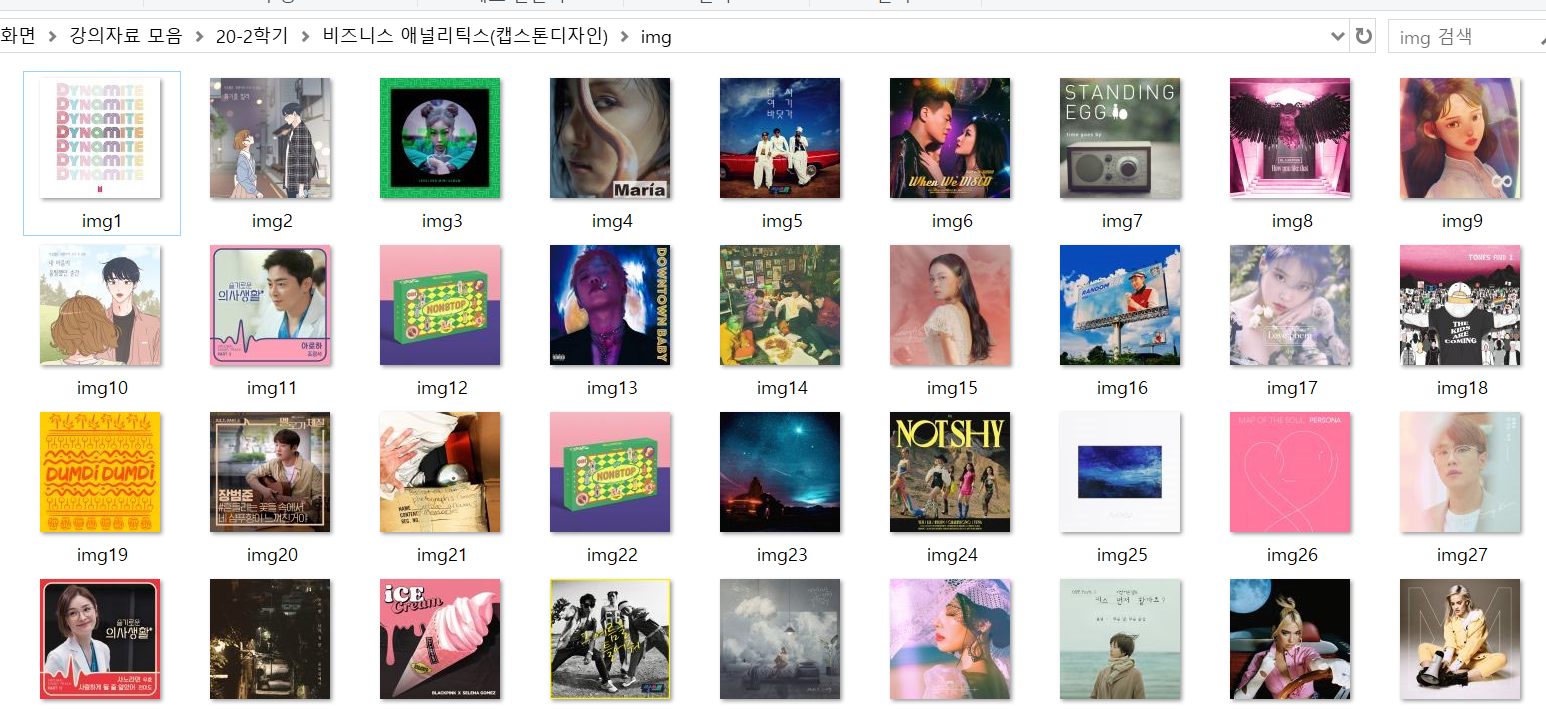